In [32]:
import os
os.chdir('..')
os.getcwd()

'/home/pafloxy/Documents/mbqc_packages'

In [422]:
import numpy as np
import networkx as nx 
from graphix.gflow import *
import galois
from tqdm import tqdm

In [34]:
GF2 = galois.GF(2)

In [35]:
o = 5 
n = 20


def generate_random_gfv(n, seed= None):
    
    V = [list(np.random.choice([0,1], size= n))]
    # size = o    
    
    if not isinstance(seed, type(None)): np.random.seed(seed)

    for nodes in range(1,n):

        C = GF2(V)
        # print(C)
        C_ns = C.null_space()
        dim_ns = len(C_ns)
        if dim_ns == 0 :
            return GF2(V) 
        
        repeated_elem = True; max_it = 0
        while repeated_elem:
            rnds = np.random.choice([0,1],size= dim_ns)
            v = C_ns[0]
            if dim_ns >= 1:
                for rnd  in rnds[1:]:
                    v = v + C_ns[rnd]
            v_ = list(np.array(v))
            if v_ in V : 
                repeated_elem = True
                max_it += 1
                if max_it > 100: break
            else:
                repeated_elem = False

        # print(len(V))
        V.append(v_)

        # for vec in range(len(V)):
        #     V[vec] += [0]
        
        # print(V)
    return GF2(V) 
    

In [36]:

def generate_random_gfv_ns(o, n, seed= None, verbose=False):
    
    V = [list(np.random.choice([0,1], size= o))]
    size = o    
    
    if not isinstance(seed, type(None)): np.random.seed(seed)

    for nodes in range(o+1,n+1):

        C = GF2(V)
        # print(C)
        C_ns = C.null_space()
        dim_ns = len(C_ns)
        if dim_ns == 0 :
            return GF2(V) 
        
        repeated_elem = True; max_it = 0
        while repeated_elem:
            rnds = np.random.choice([0,1],size= dim_ns)
            v = C_ns[0]
            if dim_ns >= 1:
                for rnd  in rnds[1:]:
                    v = v + C_ns[rnd]
            v_ = list(np.array(v))
            if v_ in V or np.sum(v_) == 0 : 
                repeated_elem = True
                max_it += 1
                if max_it > 200: break
            else:
                repeated_elem = False

        if verbose: 
            # print(np.linalg.matrix_rank(GF2(V)))
            gfv = GF2(V)
            vrank = np.linalg.matrix_rank(gfv)
            vnullity = len(gfv.null_space())
            print(f'dim : {gfv.shape[1]} ; rank : {vrank}; nullity : {vnullity}')
        # print(len(V))
        V.append(v_)

        for vec in range(len(V)):
            V[vec] += [0]*2
        
        # print(V)
    return GF2(V) 

In [37]:

def generate_random_gfv_layered(o, n, layer_p= 0.5, seed= None, verbose=False):
    
    
    size = o    
    LAYER_INFO = {0: list(range(o))}
    if not isinstance(seed, type(None)): np.random.seed(seed)

    V = [list(np.random.choice([0,1], size= o))]
    
    for nodes in range(o,n):

        ## present-layer
        C = GF2(V)
        # print(C)
        C_ns = C.null_space()
        dim_ns = len(C_ns)
        if dim_ns == 0 :
            return GF2(V) 

        repeated_elem = True; max_it = 0
        while repeated_elem:
            rnds = np.random.choice([0,1],size= dim_ns)
            v = C_ns[0]
            if dim_ns >= 1:
                for rnd  in rnds[1:]:
                    v = v + C_ns[rnd]
            v_ = list(np.array(v))
            if v_ in V or np.sum(v_) == 0 : 
                repeated_elem = True
                max_it += 1
                if max_it > 200: break
            else:
                repeated_elem = False
        
        V.append(v_)
        ## move to next-layer

        if verbose: 
            # print(np.linalg.matrix_rank(GF2(V)))
            gfv = GF2(V)
            vrank = np.linalg.matrix_rank(gfv)
            vnullity = len(gfv.null_space())
            print(f'dim : {gfv.shape[1]} ; rank : {vrank}; nullity : {vnullity}')
        # print(len(V))
        

        for vec in range(len(V)):
            V[vec] += [0]*2
        
        # print(V)
    return GF2(V) 

In [17]:
gfv = generate_random_gfv_ns(5, 25, verbose= True)
gfvnp = np.array(gfv); 
# gfvnp, gfvnp.shape
# gfv.row_space(), 
np.linalg.matrix_rank(gfvnp)

dim : 5 ; rank : 1; nullity : 4
dim : 7 ; rank : 2; nullity : 5
dim : 9 ; rank : 3; nullity : 6
dim : 11 ; rank : 4; nullity : 7
dim : 13 ; rank : 5; nullity : 8
dim : 15 ; rank : 6; nullity : 9
dim : 17 ; rank : 7; nullity : 10
dim : 19 ; rank : 8; nullity : 11
dim : 21 ; rank : 9; nullity : 12
dim : 23 ; rank : 10; nullity : 13
dim : 25 ; rank : 11; nullity : 14
dim : 27 ; rank : 12; nullity : 15
dim : 29 ; rank : 13; nullity : 16
dim : 31 ; rank : 14; nullity : 17
dim : 33 ; rank : 15; nullity : 18
dim : 35 ; rank : 16; nullity : 19
dim : 37 ; rank : 17; nullity : 20
dim : 39 ; rank : 18; nullity : 21
dim : 41 ; rank : 19; nullity : 22
dim : 43 ; rank : 20; nullity : 23


21

In [18]:
gfv.null_space()

GF([[1, 1, 0, ..., 0, 0, 0],
    [0, 0, 0, ..., 0, 0, 0],
    [0, 0, 0, ..., 0, 0, 0],
    ...,
    [0, 0, 0, ..., 1, 0, 0],
    [0, 0, 0, ..., 0, 1, 0],
    [0, 0, 0, ..., 0, 0, 1]], order=2)

In [19]:
gfv.row_space()

GF([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
id = np.array(gfv @ gfv.transpose())
# check if the matrix ar is diagonal
np.array_equal(id, np.diag(np.diag(id)))

True

In [52]:
NUM_EXP = 200
NUM_NODES = [10,20,30,40,50]

DATA = {node: None for node in NUM_NODES}


num nodes : 50: 100%|██████████| 200/200 [07:35<00:00,  2.28s/it]


In [103]:
import pickle as pkl
with open('DATA.pkl', 'wb') as f:
    pkl.dump(DATA, f)

In [95]:
NUM_NODES = [80]
for num_node in NUM_NODES:
    RANK_STAT = []
    for exp in tqdm(range(NUM_EXP), desc = 'num nodes : ' + str(num_node)):
        gfv = generate_random_gfv(num_node)
        rank = np.linalg.matrix_rank(np.array(gfv))
        RANK_STAT.append(rank)
    DATA[num_node] = RANK_STAT



num nodes : 80: 100%|██████████| 200/200 [26:02<00:00,  7.81s/it]


In [53]:
import matplotlib.pyplot as plt 

In [97]:
## normalise DATA
NDATA = {}
for nn in DATA.keys():
    NDATA[nn] =  np.array(DATA[nn]) / nn

In [98]:
for nn, data in NDATA.items():
    print(np.mean(data), np.std(data))

0.509 0.22185355530168996
0.259 0.10928860873851401
0.16316666666666665 0.0687505555533109
0.12424999999999999 0.049365347157697574
0.10240000000000002 0.039220402853616894
0.08533333333333334 0.032555934772156195
0.06425 0.025032478902417957


In [ ]:
dim1 = 2; dim2 = 3
plt.figure(figsize= (25,17))
fig, axs = plt.subplots(dim1, dim2, figsize= (25,17))
axs[0, 0].hist(NDATA[10], bins= 50,);# range= (0,1));
axs[0, 1].hist(NDATA[20], bins= 50,); #range= (0,1));
axs[0, 2].hist(NDATA[30], bins= 50,); #range= (0,1));
axs[1, 0].hist(NDATA[40], bins= 50,); #range= (0,1));
axs[1, 1].hist(NDATA[50], bins= 50,); #range= (0,1));
axs[1, 2].hist(NDATA[60], bins= 50,); #range= (0,1));

<Figure size 2500x1700 with 0 Axes>

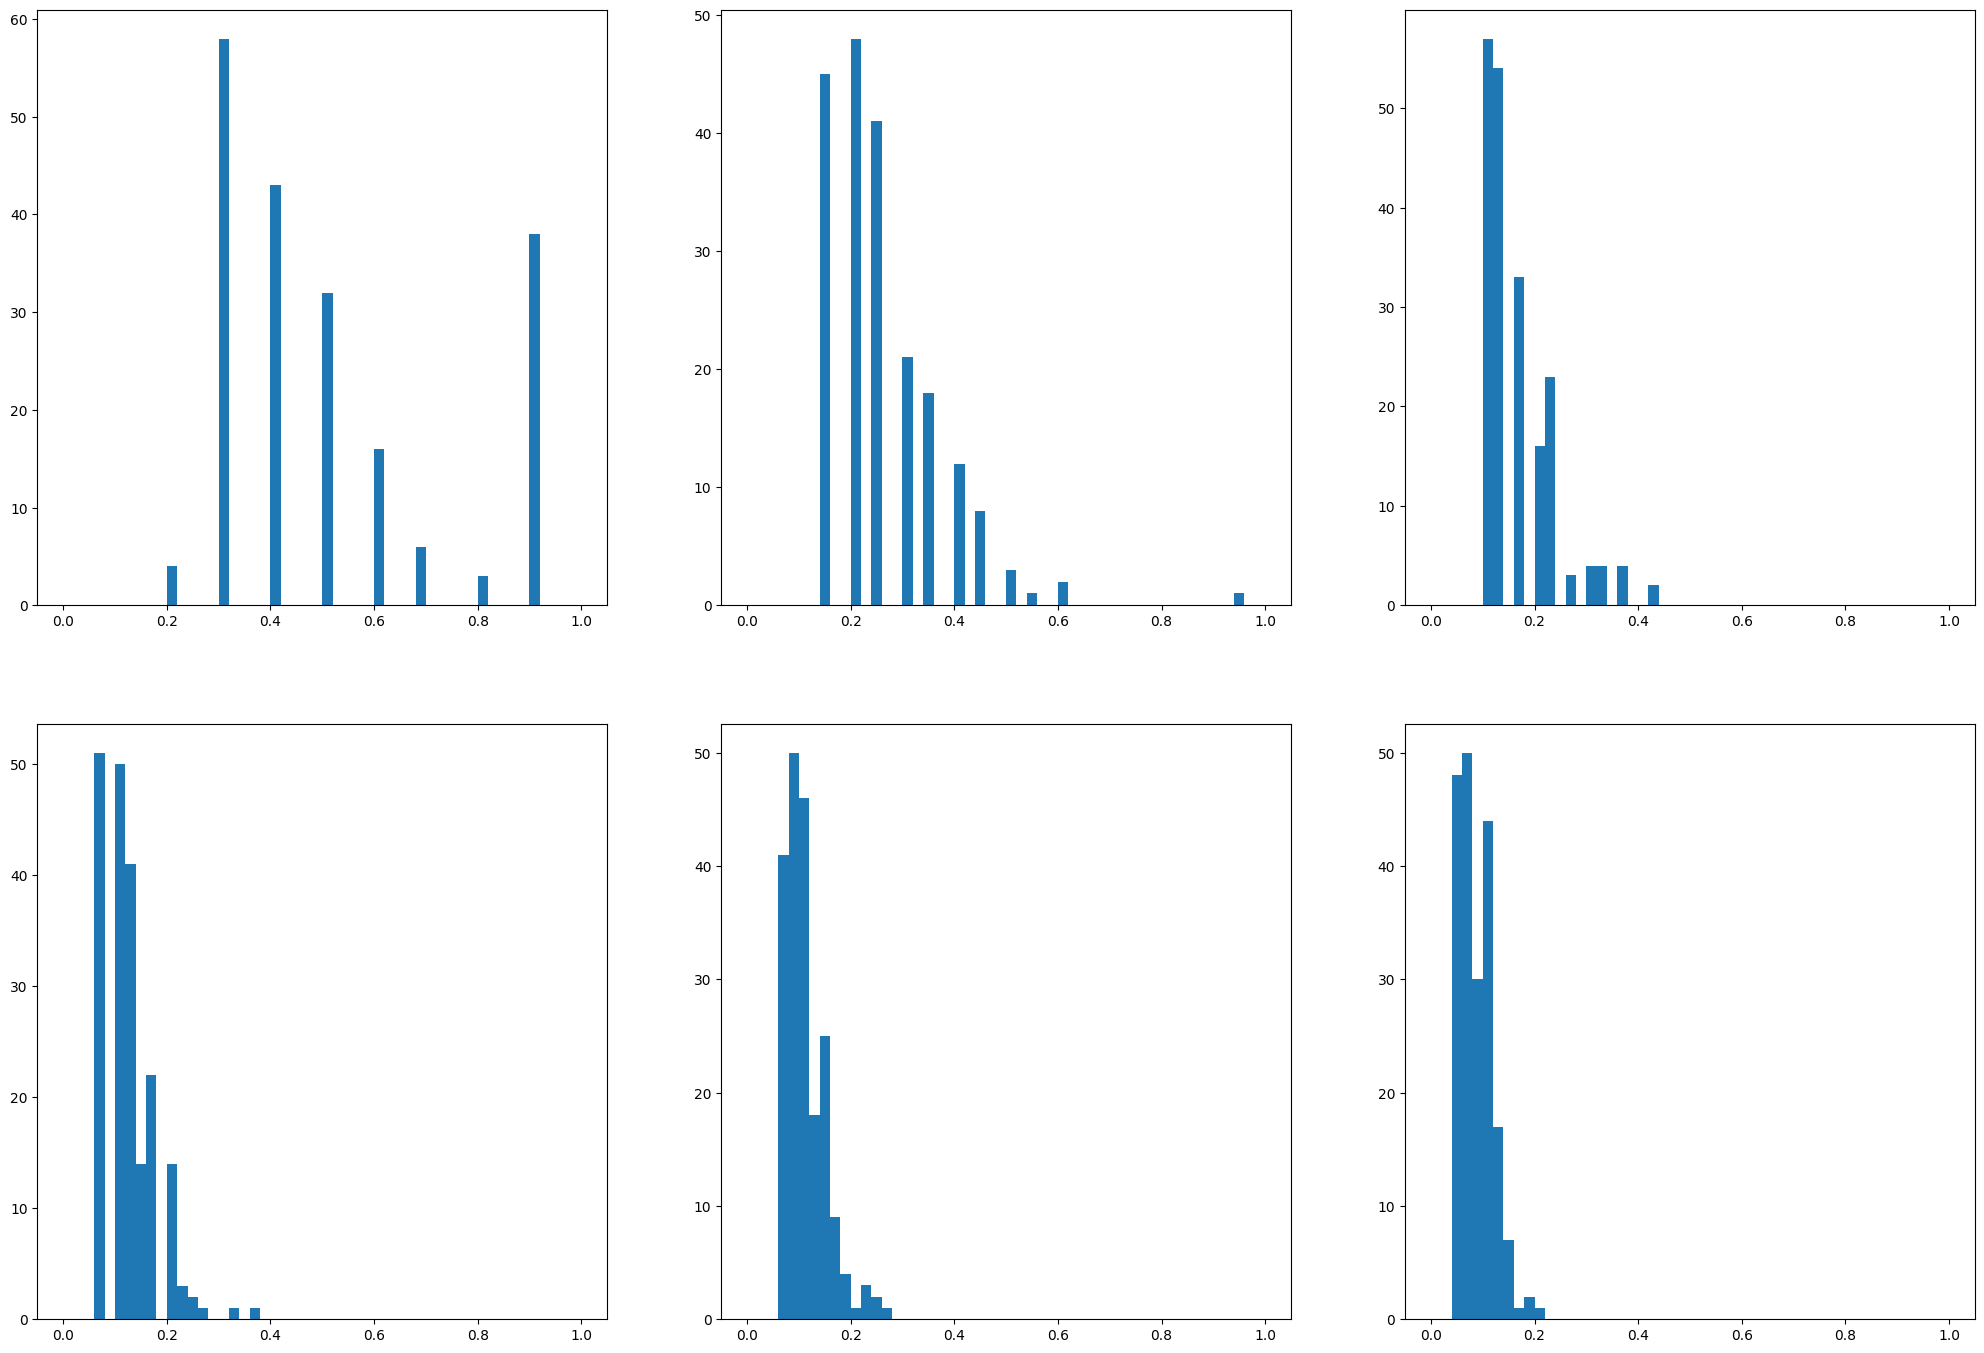

In [91]:
dim1 = 2; dim2 = 3

plt.figure(figsize= (25,17))
fig, axs = plt.subplots(dim1, dim2, figsize= (25,17))
axs[0, 0].hist(NDATA[10], bins= 50, range= (0,1));
axs[0, 1].hist(NDATA[20], bins= 50, range= (0,1));
axs[0, 2].hist(NDATA[30], bins= 50, range= (0,1));
axs[1, 0].hist(NDATA[40], bins= 50, range= (0,1));
axs[1, 1].hist(NDATA[50], bins= 50, range= (0,1));
axs[1, 2].hist(NDATA[60], bins= 50, range= (0,1));

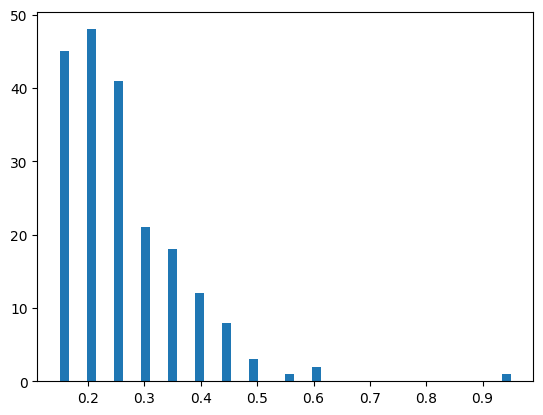

In [61]:
plt.hist(NDATA[20], bins= 50);

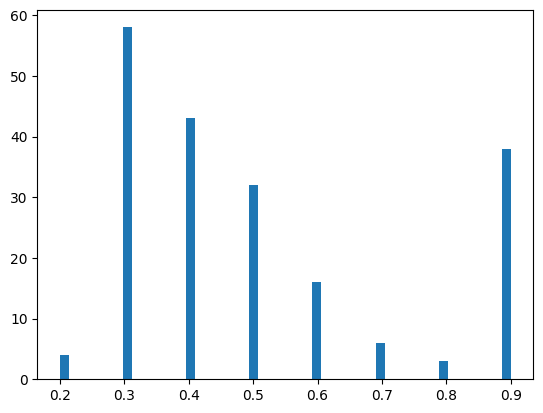

In [64]:
plt.hist(NDATA[10], bins= 50);

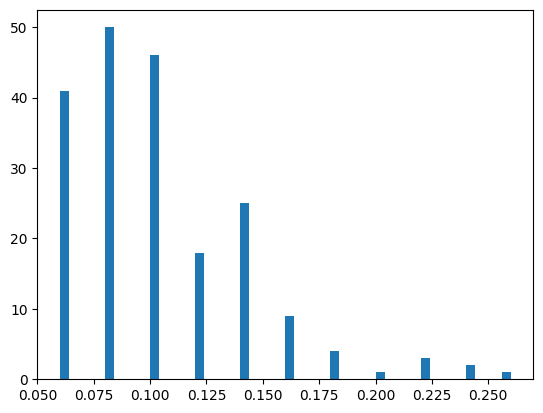

In [67]:
plt.hist(NDATA[50], bins= 50);

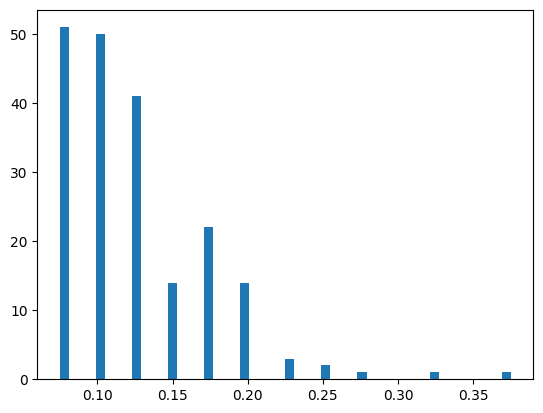

In [66]:
plt.hist(NDATA[40], bins= 50);

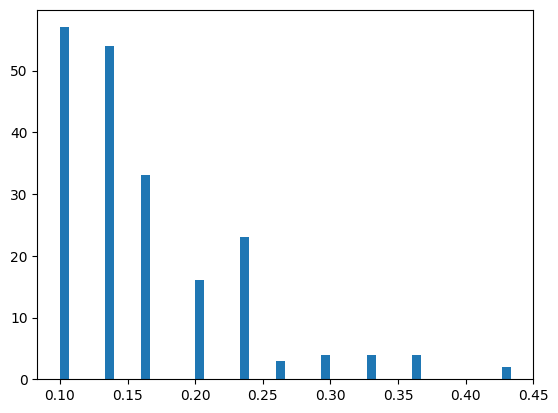

In [65]:
plt.hist(NDATA[30], bins= 50);

In [415]:
is_diagonal = lambda id :  np.array_equal(id, np.diag(np.diag(id)))

In [447]:
# rg = GF2.Random((6,10)); rg
rg = generate_random_gfv(15); rg
id = rg @ rg.T

if is_diagonal(id):
    rg_ns = rg.null_space();rg_rs = rg.row_space()
    rg_rs_e = [r for r in rg_rs if r @ r.T == 0] 
    rg_ns_e = [r for r in rg_ns if r @ r.T == 0]
    print (f" dim ={rg.shape[0]} | null-dim = (e):{len(rg_ns_e)} + (o):{len(rg_ns)-len(rg_ns_e)} | rank= (e):{len(rg_rs_e)} + (o):{len(rg_rs)-len(rg_rs_e)} ")
    # rg_ns, rg_rs
    # rg_rs[-2], rg_rs[1] 
# rg @ rg_ns.T


 dim =15 | null-dim = (e):2 + (o):8 | rank= (e):4 + (o):1 


In [448]:
for elem in np.array(rg_rs).tolist() :
    print(elem in  np.array(rg_ns).tolist())

False
False
True
False
False


In [449]:
for elem in np.array(rg_rs_e).tolist() :
    print(elem in  np.array(rg_ns_e).tolist())

False
True
False
False


In [458]:
rg.row_reduce()

GF([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], order=2)

In [450]:
rg @ GF2(rg_rs_e).T

GF([[0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]], order=2)

In [451]:
rg_rs_e,rg_ns_e

([GF([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], order=2),
  GF([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], order=2),
  GF([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], order=2),
  GF([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], order=2)],
 [GF([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], order=2),
  GF([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], order=2)])

In [452]:
for i in rg_rs:
    for j in rg_ns:
        if np.array_equal(j, i) :
            print(j)
            print(i @ i.T, np.sum(rg @ j.T))
            

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
0 0


In [453]:
for i in rg_rs:
    if np.sum(rg @ i.T) ==0 :
        for j in rg_ns:
            if np.array_equal(j, i) :
            
                print(j)
                print(i @ i.T, np.sum(rg @ j.T))
            

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
0 0


In [454]:
id = rg @ rg.T
is_diagonal = lambda id :  np.array_equal(id, np.diag(np.diag(id)))

is_diagonal(id)

True

In [455]:
rg

GF([[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], order=2)

In [456]:
rg_rs,rg_ns

(GF([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]], order=2),
 GF([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
     [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], order=2))

In [457]:
rg @ rg_rs.T

GF([[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0],
    [1, 1, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]], order=2)